**Actividad PBL 1**

Autores:


*   Daniel Makoszay Castañón       - A01750046
*   Santiago Jiménez Pasillas      - A01749970
*   Santiago Palavicini Saldívar   - A01749103
*   Ximena Serna Mendoza           - A01749870
*   Guillermo Ian Barbosa Martínez - A01747926



# **Dependencias, librerías y módulos**
**NLTK**        - NLP

**Pandas**      - Procesamiento de datos

**ScikitLearn** - Creación, entrenamiento y validación de modelos Naive Bayes

**WordCloud**   - Visualización de las palabras por correos

**Matplotlib**  - Visualización de las clasificaciones

**Seaborn**     - Visualización de las clasificaciones

In [1]:
'''
Importamos librerías que usaremos en el código
Las primeras son para hacer NLP (Natural Language Processing)
'''
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

'''
Pandas nos permite cargar los datos y modificar las tablas
'''
import pandas as pd

'''
De scikit learn importamos librería la implementación del modelo Multinomial y Gaussiano Naive Bayes para experimentar con ambos.
'''
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB

'''
Estas librerías nos permiten hacer visualizaciones tanto de los datos como los resultados.
'''
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


# **Importación y procesamiento de los datos**

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1') # Carga de los datos
df.head()                                                               # Primeros 5 correos

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.tail() # Últimos 5 correos

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df.sample(5) # Muestra de 5 correos

,v1,v2
638,ham,"What will we do in the shower, baby?"
5060,ham,"Sorry, I'll call you later. I am in meeting sir."
1527,ham,No screaming means shouting..
4740,ham,Many more happy returns of the day. I wish you...
1431,ham,My painful personal thought- \I always try to ...


In [29]:
# Cambiamos las columnas y sus valores para que sean más claras y describan mejor la información
df['message'] = df['v2'].apply(lambda x: x)                                           # Se renombra la columna 'v2' como mensajes
df['label'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)                       # Se transforma la columna 'v1' de etiquetas en valores binarios (1,0)
df.drop(['v1', 'v2'], axis=1, inplace=True)
#df.drop(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True) # Se eliminan columnas innecesarias
df.sample(5)                                                                          # Validación de la transformación del dataset

,message,label
4036,Dont flatter yourself... Tell that man of mine...,0
3628,Should I head straight there or what,0
4300,Are there TA jobs available? Let me know pleas...,0
3236,Ron say fri leh. N he said ding tai feng cant ...,0
4029,"Cool, I'll text you in a few",0


In [30]:
df.drop_duplicates(inplace=True)      # Eliminación de duplicados
print('Valores nulos por columna:')
df.isnull().sum()                     # Valores nulos por columna

Valores nulos por columna:


message    0
label      0
dtype: int64

In [31]:
print("Tamaño del dataset:", df.shape)

Tamaño del dataset: (5169, 2)


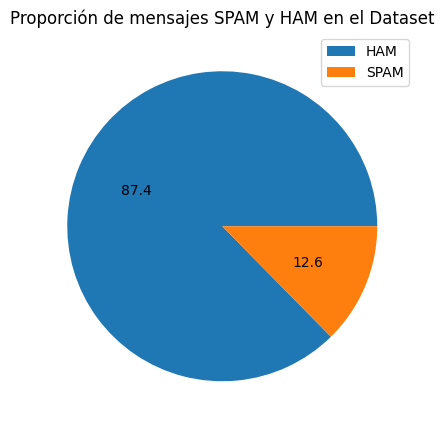

In [32]:
plt.figure(figsize=(5,10))
plt.pie(df['label'].value_counts(), autopct="%0.1f")
plt.legend(['HAM', 'SPAM'])
plt.title('Proporción de mensajes SPAM y HAM en el Dataset')
plt.show()

**Palabras en mensajes SPAM**

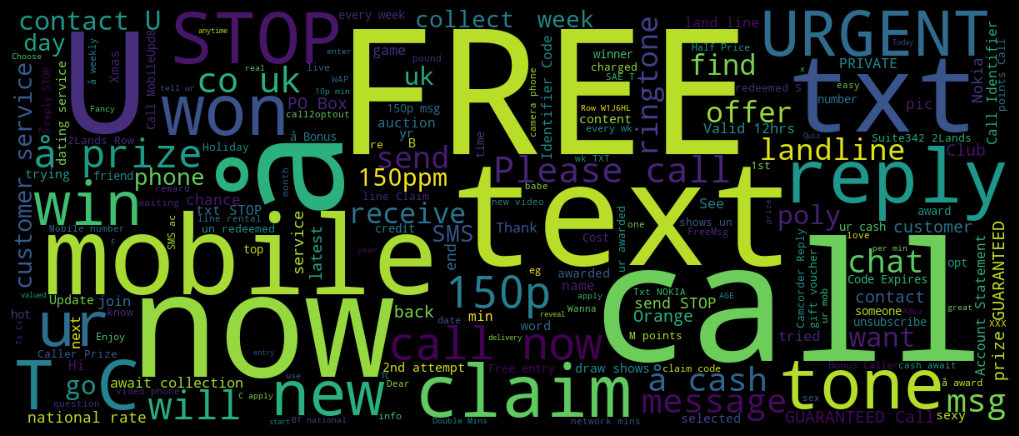

In [33]:
spam_words = ' '.join(list(df[df['label'] == 1]['message']))
spam_wc = WordCloud(width=1200, height=500).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Palabras en mensajes HAM**

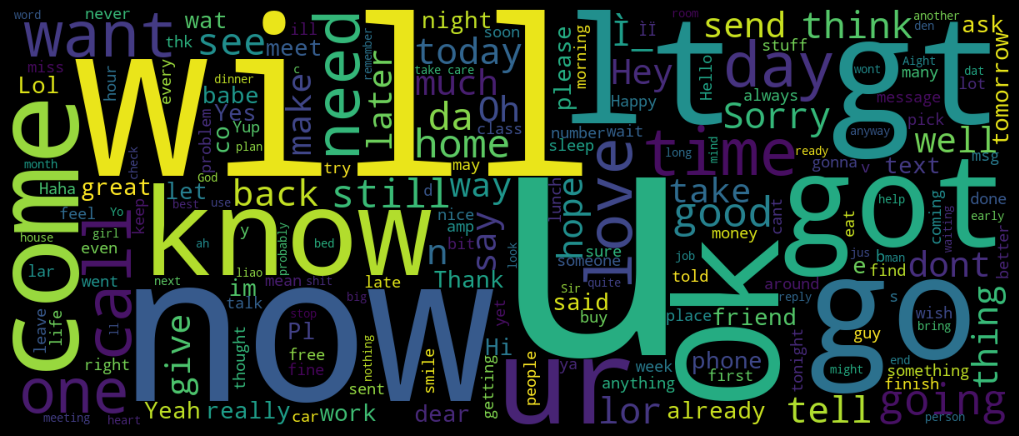

In [34]:
ham_words = ' '.join(list(df[df['label'] == 0]['message']))
ham_wc = WordCloud(width=1200, height=500).generate(ham_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Pre-procesamiento de los mensajes**

In [35]:
# Definimos una función para preparar los datos
def prepare_message(message):
  message = message.lower()                     # Todo lo hacemos minusculas
  words = word_tokenize(message)                # Ponemos cada palabra en un elemento de la lista words
  words_stop = []
  for i in words:                               # Iteramos en la lista de words para quitar palabras que no agregan información
    if i not in stopwords.words('english'):
      words_stop.append(i)
  words_s_stem = []
  for i in words_stop:                          # Iteramos en la lista de words_stop para llegar a la raíz de las palabras
    words_s_stem.append(PorterStemmer().stem(i))
    message = ' '.join(words_s_stem)            # Juntamos las palabras en un string
  return message

In [36]:
df['message'] = df['message'].apply(prepare_message)  # Transformamos la columna de mensajes con la función definida
df.sample(5)                                          # Validación de la transformación

,message,label
3789,love ! ! ! know ? feel ? make belli warm ? wis...,0
111,go dinner.msg .,0
3169,"mah b , 'll pick tomorrow",0
3284,make easi pay back . & lt ; # & gt ; yr say pa...,0
730,email alertfrom : jeri stewarts : 2kbsubject :...,1


# **Segmentación: Datos de entrenamiento y de prueba**

In [37]:
# Separamos los datos entre las entradas que son los correos "X", y las salidas que son la etiqueta entre spam o ham "y"
X = df['message']
y = df['label']

# Ahora separamos tanto las "X" como las "y" en entrenamiento y prueba, asignando 80% de los datos al entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
# Usamos Count Vectorizer para vectorizar los correos basandose en su frecuencia
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train) # Para los datos de entrenamiento
X_test = vectorizer.transform(X_test)      # Para los datos de prueba

# **Naive Bayes: Multinomial**

**Entrenamiento**

In [39]:
# Hacemos el entrenamiento de Multinomial Naive Bayes
multinomial_model = MultinomialNB().fit(X_train, y_train)

In [40]:
from sklearn.metrics import classification_report, precision_score, recall_score
y_train_pred = multinomial_model.predict(X_train)   # Predicción con datos de entrenamiento

print('Reporte de Clasificación del Entrenamiento del Modelo Multinomial:')
print(classification_report(y_train, y_train_pred))

Reporte de Clasificación del Entrenamiento del Modelo Multinomial:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3617
           1       0.98      0.97      0.98       518

    accuracy                           0.99      4135
   macro avg       0.99      0.98      0.99      4135
weighted avg       0.99      0.99      0.99      4135



Puntuación (Entrenamiento) del Modelo Multinomial:      0.99
Precisión (Entrenamiento) del Modelo Multinomial:       0.98
Recall (Entrenamiento) del Modelo Multinomial:          0.97
Puntaje ROC-AUC (Entrenamiento) del Modelo Multinomial: 0.98
Puntaje F1 (Entrenamiento) del Modelo Multinomial:      0.98



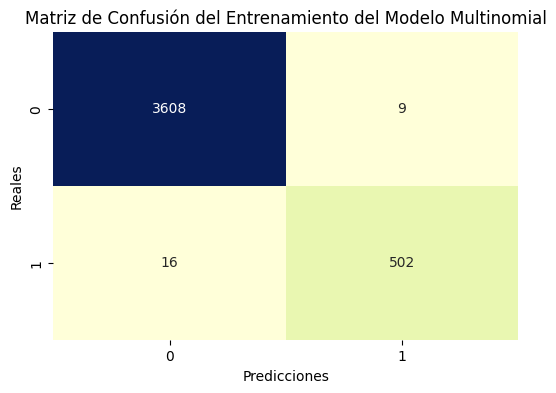

In [41]:
from sklearn.metrics import roc_auc_score
print(f"Puntuación (Entrenamiento) del Modelo Multinomial:      {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Precisión (Entrenamiento) del Modelo Multinomial:       {precision_score(y_train, y_train_pred):.2f}")
print(f"Recall (Entrenamiento) del Modelo Multinomial:          {recall_score(y_train, y_train_pred):.2f}")
print(f"Puntaje ROC-AUC (Entrenamiento) del Modelo Multinomial: {roc_auc_score(y_train, y_train_pred):.2f}")
print(f"Puntaje F1 (Entrenamiento) del Modelo Multinomial:      {f1_score(y_train, y_train_pred):.2f}\n")

conf_matrix = confusion_matrix(y_train, y_train_pred)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión del Entrenamiento del Modelo Multinomial")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

**Validación**

In [42]:
y_test_pred = multinomial_model.predict(X_test)           # Predicción con datos de validación

print('Reporte de Clasificación de la Validación del Modelo Multinomial:')
print(classification_report(y_test, y_test_pred))

Reporte de Clasificación de la Validación del Modelo Multinomial:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       899
           1       0.95      0.92      0.94       135

    accuracy                           0.98      1034
   macro avg       0.97      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



Puntuación (Validación) del Modelo Multinomial:      0.98
Precisión (Validación) del Modelo Multinomial:       0.95
Recall (Validación) del Modelo Multinomial:          0.92
Puntaje ROC-AUC (Validación) del Modelo Multinomial: 0.96
Puntaje F1 (Validación) del Modelo Multinomial:      0.94



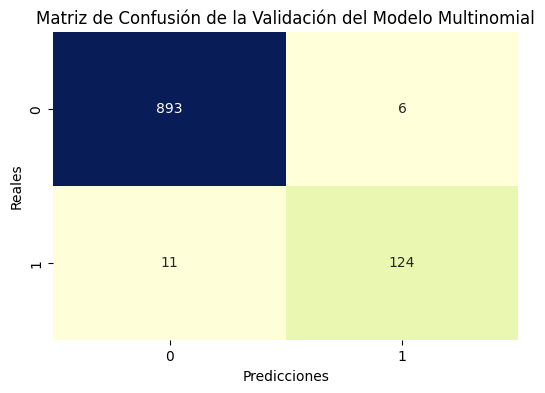

In [43]:
print(f"Puntuación (Validación) del Modelo Multinomial:      {accuracy_score(y_test, y_test_pred):.2f}")
print(f"Precisión (Validación) del Modelo Multinomial:       {precision_score(y_test, y_test_pred):.2f}")
print(f"Recall (Validación) del Modelo Multinomial:          {recall_score(y_test, y_test_pred):.2f}")
print(f"Puntaje ROC-AUC (Validación) del Modelo Multinomial: {roc_auc_score(y_test, y_test_pred):.2f}")
print(f"Puntaje F1 (Validación) del Modelo Multinomial:      {f1_score(y_test, y_test_pred):.2f}\n")

conf_matrix = confusion_matrix(y_test, y_test_pred)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión de la Validación del Modelo Multinomial")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

# **Naive Bayes: Gaussiano**

In [44]:
# Hacemos el entrenamiento de Gaussian Naive Bayes
gaussian_model = GaussianNB().fit(X_train.toarray(), y_train)

In [45]:
y_train_pred = gaussian_model.predict(X_train.toarray())   # Predicción con datos de entrenamiento

print('Reporte de Clasificación del Entrenamiento del Modelo Gaussiano:')
print(classification_report(y_train, y_train_pred))

Reporte de Clasificación del Entrenamiento del Modelo Gaussiano:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      3617
           1       0.63      1.00      0.78       518

    accuracy                           0.93      4135
   macro avg       0.82      0.96      0.87      4135
weighted avg       0.95      0.93      0.93      4135



Puntuación (Entrenamiento) del Modelo Gaussiano:      0.93
Precisión (Entrenamiento) del Modelo Gaussiano:       0.63
Recall (Entrenamiento) del Modelo Gaussiano:          1.00
Puntaje ROC-AUC (Entrenamiento) del Modelo Gaussiano: 0.96
Puntaje F1 (Entrenamiento) del Modelo Gaussiano:      0.78



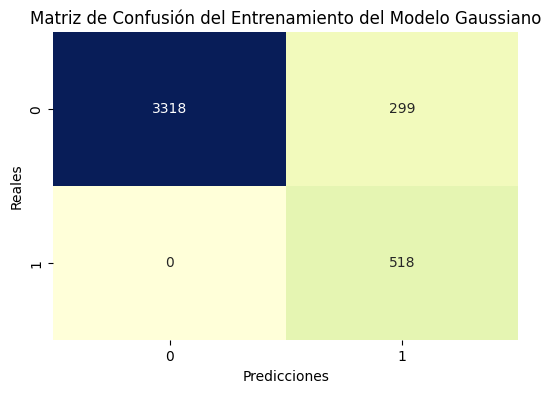

In [46]:
print(f"Puntuación (Entrenamiento) del Modelo Gaussiano:      {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Precisión (Entrenamiento) del Modelo Gaussiano:       {precision_score(y_train, y_train_pred):.2f}")
print(f"Recall (Entrenamiento) del Modelo Gaussiano:          {recall_score(y_train, y_train_pred):.2f}")
print(f"Puntaje ROC-AUC (Entrenamiento) del Modelo Gaussiano: {roc_auc_score(y_train, y_train_pred):.2f}")
print(f"Puntaje F1 (Entrenamiento) del Modelo Gaussiano:      {f1_score(y_train, y_train_pred):.2f}\n")

conf_matrix = confusion_matrix(y_train, y_train_pred)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión del Entrenamiento del Modelo Gaussiano")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

**Validación**

In [47]:
y_test_pred = gaussian_model.predict(X_test.toarray())           # Predicción con datos de validación

print('Reporte de Clasificación de la Validación del Modelo Gaussiano:')
print(classification_report(y_test, y_test_pred))

Reporte de Clasificación de la Validación del Modelo Gaussiano:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       899
           1       0.52      0.89      0.65       135

    accuracy                           0.88      1034
   macro avg       0.75      0.88      0.79      1034
weighted avg       0.92      0.88      0.89      1034



Puntuación (Validación) del Modelo Gaussiano:      0.88
Precisión (Validación) del Modelo Gaussiano:       0.52
Recall (Validación) del Modelo Gaussiano:          0.89
Puntaje ROC-AUC (Validación) del Modelo Gaussiano: 0.88
Puntaje F1 (Validación) del Modelo Gaussiano:      0.65



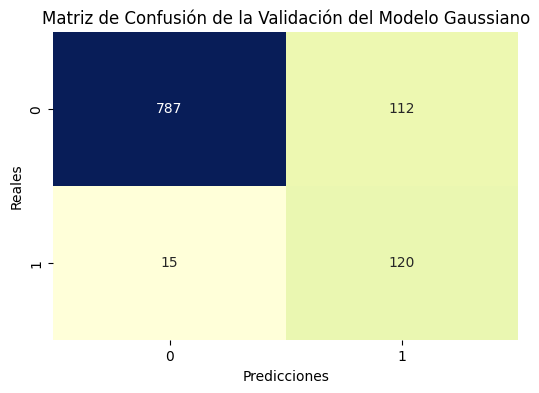

In [48]:
print(f"Puntuación (Validación) del Modelo Gaussiano:      {accuracy_score(y_test, y_test_pred):.2f}")
print(f"Precisión (Validación) del Modelo Gaussiano:       {precision_score(y_test, y_test_pred):.2f}")
print(f"Recall (Validación) del Modelo Gaussiano:          {recall_score(y_test, y_test_pred):.2f}")
print(f"Puntaje ROC-AUC (Validación) del Modelo Gaussiano: {roc_auc_score(y_test, y_test_pred):.2f}")
print(f"Puntaje F1 (Validación) del Modelo Gaussiano:      {f1_score(y_test, y_test_pred):.2f}\n")

conf_matrix = confusion_matrix(y_test, y_test_pred)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión de la Validación del Modelo Gaussiano")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

**Ejemplo de mensajes ham y spam para ver la forma en la que el modelo Multinomial Naive Bayes lo clasifica**

In [49]:
# Agregamos un nuevo mensaje ham para ver cómo el modelo Multinomial Naive Bayes lo clasifica
h_message = "I cant pick the phone right now. Pls send a message"

# Preparamos el mensaje nuevo
prep_mess = prepare_message(h_message)

# Vectorizamos el mensaje
mess_vect = vectorizer.transform([prep_mess])

# Clasificamos el mensaje
prediction = multinomial_model.predict(mess_vect)

# Interpretamos el mensaje, 1 si es spam, 0 si es ham
if prediction[0] == 1:
    print("El mensaje es spam.")
else:
    print("El mensaje es ham (no es spam).")

El mensaje es ham (no es spam).


In [50]:
# Agregamos un nuevo mensaje spam para ver cómo el modelo Multinomial Naive Bayes lo clasifica
s_message = "Congratulations ur awarded $500"

# Preparamos el mensaje nuevo
prep_mess = prepare_message(s_message)

# Vectorizamos el mensaje
mess_vect = vectorizer.transform([prep_mess])

# Clasificamos el mensaje
prediction = multinomial_model.predict(mess_vect)

# Interpretamos el mensaje, 1 si es spam, 0 si es ham
if prediction[0] == 1:
    print("El mensaje es spam.")
else:
    print("El mensaje es ham (no es spam).")

El mensaje es spam.


**Ejemplo de mensajes ham y spam para ver la forma en la que el modelo Gaussian Naive Bayes lo clasifica**

In [51]:
# Agregamos un nuevo mensaje ham para ver cómo el modelo Gaussian Naive Bayes lo clasifica
s_message = "I cant pick the phone right now. Pls send a message"

# Preparamos el mensaje nuevo
prep_mess = prepare_message(s_message)

# Vectorizamos el mensaje
mess_vect = vectorizer.transform([prep_mess])

# Clasificamos el mensaje
prediction = gaussian_model.predict(mess_vect.toarray())

# Interpretamos el mensaje, 1 si es spam, 0 si es ham
if prediction[0] == 1:
    print("El mensaje es spam.")
else:
    print("El mensaje es ham (no es spam).")

El mensaje es spam.


In [52]:
# Agregamos un nuevo mensaje spam para ver cómo el modelo Gaussian Naive Bayes lo clasifica
s_message = "Congratulations ur awarded $500"

# Preparamos el mensaje nuevo
prep_mess = prepare_message(s_message)

# Vectorizamos el mensaje
mess_vect = vectorizer.transform([prep_mess])

# Clasificamos el mensaje
prediction = gaussian_model.predict(mess_vect.toarray())

# Interpretamos el mensaje, 1 si es spam, 0 si es ham
if prediction[0] == 1:
    print("El mensaje es spam.")
else:
    print("El mensaje es ham (no es spam).")

El mensaje es spam.
